# Supervised Classification

Le but de ce TP est d'utiliser deux méthodes différentes sur des données simulées et de voir l'influence de leur paramètres sur leur résultat.

On commence par les SVMs.

## Support Vector Machines

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC     # "Support Vector Classifier"
from matplotlib.colors import ListedColormap


import warnings
warnings.filterwarnings('ignore')

### Cas séparable

Le premier cas que auquel on s'intéresse est celui où les données sont linéairement séparables. C'est à dire, elles sont générées par
$$ Y = f(X) $$
=======
où $f$ est le signe d'une fonction affine.
Commençons par générer et afficher ces données.

##### Exemple 1

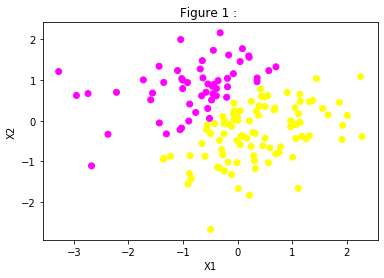

In [2]:
n=150
X=np.random.randn(n,2)
w=[1,-1]
b=0.5
Y=np.sign((np.dot(X,w)+0.5)).ravel()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="spring")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Figure 1 : ')
plt.show()



Ici les données sont séparables par une droite. Le module SVC de *scikitlearn* permet de trouver la droite qui passe avec la marge maximale séparant les données. On cherche alors à résoudre le problème suivant:
$$ \min \left\{ \left. \frac{1}{2} \|w\|^2 \right| y_i(<w,x_i>+b)\geq 1, \forall 1\leq i \leq n \right\}$$
-----

In [3]:
clf = SVC(kernel='linear',C=np.Inf)
clf.fit(X, Y)
print(clf.coef_)
print(clf.intercept_)
print(clf.coef_/np.linalg.norm(clf.coef_))
print(w/np.linalg.norm(w))

[[ 23.14836101 -22.2833237 ]]
[12.17763782]
[[ 0.72043979 -0.69351749]]
[ 0.70710678 -0.70710678]


**Quel est le lien entre** *clf.intercept_* **et la formulation mathématique du problème?**

*Réponse:* 

*clf_intercept_* reprénsente **b** de la formulation mathématique, c'est la constante de la fonction de décision.\
À noter qu'il n'est défini qu'en cas d'un noyeau linéaire



**Compléter la fonction** *plot_svc* **suivante afin qu'elle trace la droite portée par $\beta$ et celle trouvée par SVC**

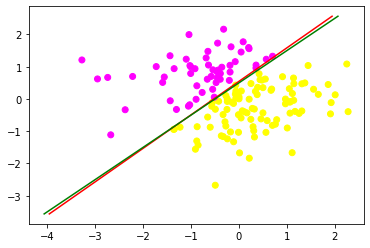

In [4]:
def plot_svc(clf, ax=None):
    if ax is None:
        ax = plt.gca()
    wstar=clf.coef_.ravel()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    ystar = (-1/wstar[0])*(x*wstar[1] + clf.intercept_)
    y = (-1/w[0])*(x*w[1] + b)
    ax.plot(ystar,x,c="red")
    ax.plot(y,x,c="green")

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="spring");
plot_svc(clf,plt.gca())

**Explication mathématique:**

L'équation de la droite qui sépare les points jaunes de ceux roses a la forme suivante:

$$ w_{1} X_{2} + w_{0} X_{1} + \beta = 0 $$ 

$$ X_{2} = \frac{-1}{w_{1}} (w_{0} X_{1} + \beta)$$

Où $\beta$ est *clf_intercept_* 


#### Cas non séparable

On considère maintenant le cas non séparable; certaines données ne sont pas bien étiquetées pour une séparatation linéaire. On autorise alors quelques erreurs dans la recherche de la marge maximale:
$$ \min \left\{ \left. \frac{1}{2} \|w\|^2 + C \sum_{i=1}^n \xi_i \right| y_i(<w,x_i>+b)\geq 1 - \xi_i, \forall 1\leq i \leq n \right\}$$
-----

Cette minimisation est implémentée dans la module SVC; c'est la raison pour laquelle on a posé *C=np.Inf* plus haut.
On intègre un bruit dans la génération de nos données pour des avoir des données non séparables.

##### Exemple 2

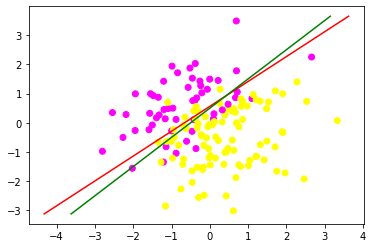

In [5]:
n=150
X=np.random.randn(n,2)
w=[1,-1]
b=0.5
eps=0.7*np.random.randn(n,1)
Y=np.sign((np.dot(X,w)+0.5).reshape(-1,1)+eps).ravel()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="spring");

clf = SVC(kernel='linear')
clf.fit(X, Y)
plot_svc(clf,plt.gca());

Il possible de voir les points pour lesquels la contraintes est active; ce sont les **vecteurs support**. On les retrouve à l'aide de l'attribut 

    support_vectors_

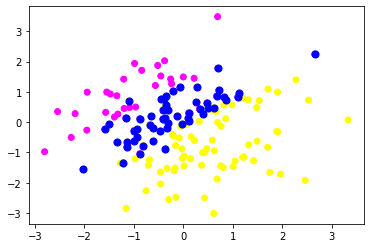

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='spring')
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=50, facecolors='blue');

À l'aide de la fonction ``interact`` d'iPython, on peut voir l'effet de la constante *C* sur la méthode.

In [7]:
from IPython.html.widgets import interact

n=150
X=np.random.randn(n,2)
w=[1,-1]
b=0.5
eps=np.random.randn(n,1)
Y=np.sign((np.dot(X,w)+0.5).reshape(-1,1)+eps).ravel()


def call_plot_svc(C=1):
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="spring");
    clf = SVC(kernel='linear',C=C/100.)
    clf.fit(X, Y)
    plot_svc(clf,plt.gca());

    
interact(call_plot_svc, C=[1, 50], kernel='linear');

interactive(children=(Dropdown(description='C', options=(1, 50), value=1), Output()), _dom_classes=('widget-in…

On peut aussi générer les données de la manière suivante.
On tire une variable gaussienne centrée en $(0,2)$ puis une centrée en $(-2,0)$.

L'objectif est alors de retrouver suivant quelle loi a été tirée la variable aléatoire.

##### Exemple 3

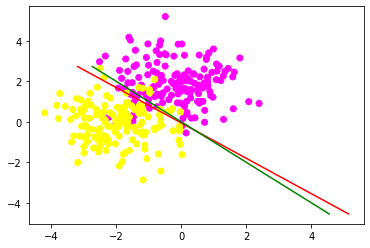

In [8]:
n=150
X=np.append(np.random.randn(n,2)+[0,2],np.random.randn(n,2)+[-2,0],axis=0)
w=[1,1]
b=0
Y=np.append(np.zeros(n),np.ones(n))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="spring");

clf = SVC(kernel='linear')
clf.fit(X, Y)
plot_svc(clf,plt.gca());

Il n'est pas possible de faire mieux que de scinder l'espace en deux pour retrouver l'origine de la variable alétoire.

#### SVM à noyaux

Les SVMs à noyaux permettent de rendre *linéairement* séparables des données qui ne le sont pas, en les plongeant dans un espace de plus grande dimension.

Cette fois, on définit deux variables aléatoires gaussiennes centrées en $(0,0)$ de variance $1$ et $16$.

L'objectif est encore de retrouver la loi de chacune des variables aléatoires.

##### Exemple 4

(300, 2)


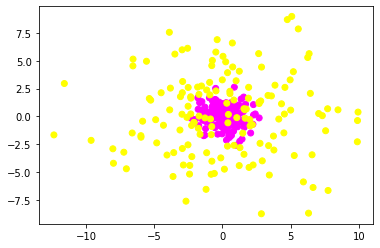

In [9]:
n=150
X=np.append(np.random.randn(n,2),4*np.random.randn(n,2),axis=0)
print(X.shape)
w=[1,1]
b=0
Y=np.append(np.zeros(n),np.ones(n),axis=0)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="spring");

In [10]:
def plot_color_decision(clf, ax=None):
    if ax is None:
        ax = plt.gca()

    h=0.05
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
    # Plot also the training points
    ax.xlim(xx.min(), xx.max())
    ax.ylim(yy.min(), yy.max())
    ax.title("SVM classification")
    ax.show()

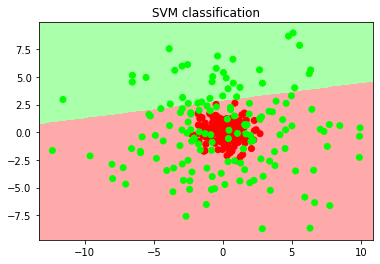

In [11]:
clf = SVC(kernel="linear")
clf.fit(X, Y)
plot_color_decision(clf,plt)

Pour contourner ce problème, on va envoyer les données dans un espace dans lequel elles seront linéairement séparable. On peut faire ça dans un espace de dimension infini (par exemple $L_2$), mais on pour comprendre le principe, on va voir comment on peut envoyer les données dans un espace en 3D. Pour ça on ajoute une troisème coordonnée:

In [12]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

In [13]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=Y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90,90,45,-45], azip=(-180, 180));

interactive(children=(Dropdown(description='elev', options=(-90, 90, 45, -45), value=-90), IntSlider(value=30,…

Il est plus raisonnable ici de vouloir séparer les données par un plan linéaire dans ce plongement en 3D!

Le noyau gaussien (issu d'un plongement des données dans un espace de dimension infinie) donne le résultat suivant.

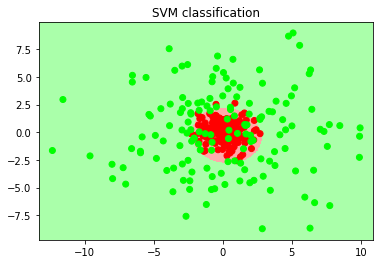

In [14]:
clf = SVC()
clf.fit(X, Y)
plot_color_decision(clf,plt)

**Utiliser la fonction**

    interact
    
**pour voir l'influence du paramètre** *gamma* **sur le méthode.**


La valeur par défault de **kernel** est 'rbf', il s'agit de la transformation suivant: 
$$ \kappa(\mathbf{X_{2}},\mathbf{X_{1}}) = \exp(-\gamma \|\mathbf{X_{2}}-\mathbf{X_{1}}\|^2) $$

Avec $\gamma$ est le coefficient du kernet "**Kernel coefficient**"

D'après la docummentation officielle de la **SVC**: \
gamma{‘scale’, ‘auto’} or float, default=’scale’
* if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,

* if ‘auto’, uses 1 / n_features.


In [15]:
from IPython.html.widgets import interact
n=150
X=np.append(np.random.randn(n,2),4*np.random.randn(n,2),axis=0)
print(X.shape)
w=[1,1]
b=0
Y=np.append(np.zeros(n),np.ones(n),axis=0)

def fit_SVC( gamma):
    clf_interact = SVC(kernel = 'rbf', gamma = gamma)
    clf_interact.fit(X,Y)
    plot_color_decision(clf_interact, plt)
    
    
interact(fit_SVC, gamma = ['scale', 'auto', 4e-05 ,0.01, 3])


(300, 2)


interactive(children=(Dropdown(description='gamma', options=('scale', 'auto', 4e-05, 0.01, 3), value='scale'),…

<function __main__.fit_SVC(gamma)>

# K plus proches voisins

**Reprenez les 4 exemples de la méthode SVM et implémentez le méthode des k-plus proches voisins à l'aide de la classe **

    neighbors.KNeighborsClassifier   

In [16]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


#### Exemple 1

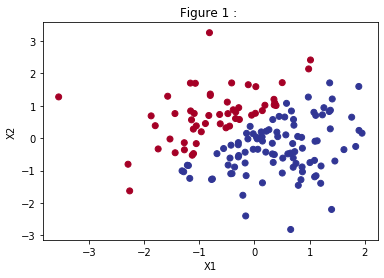

In [17]:
n=150
X=np.random.randn(n,2)
w=[1,-1]
b=0.5
Y=np.sign((np.dot(X,w)+0.5)).ravel()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="RdYlBu")
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Figure 1 : ')
plt.show()



In [18]:
def plot_color_decision_knn(knn, ax=None):
    if ax is None:
        ax = plt.gca()

    h=0.05
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', 'cornflowerblue'])
    cmap_bold = ListedColormap(['#FF0000', 'cyan'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bold)
    # Plot also the training points
    ax.xlim(xx.min(), xx.max())
    ax.ylim(yy.min(), yy.max())
    ax.title("KNN classification( Nombre de voisins =  {}, weights : {})".format(n_neighbors, weights))
    ax.show()

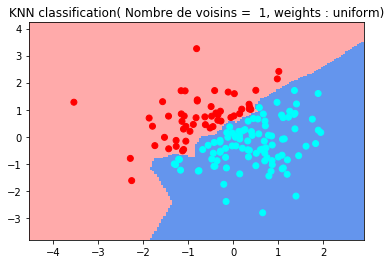

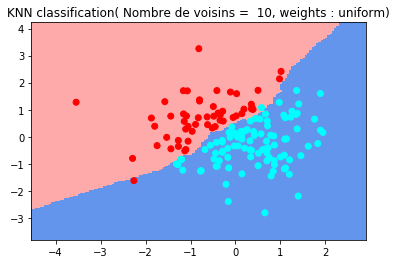

In [19]:
weights = 'uniform'
neighb = [1,10]
for i in neighb:
    n_neighbors = i
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(X,Y)
    plot_color_decision_knn(knn, plt)
plt.show()

#### Exemple 2

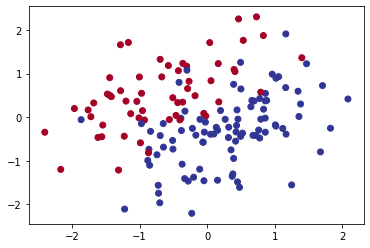

In [20]:
n=150
X=np.random.randn(n,2)
w=[1,-1]
b=0.5
eps=0.7*np.random.randn(n,1)
Y=np.sign((np.dot(X,w)+0.5).reshape(-1,1)+eps).ravel()
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="RdYlBu");


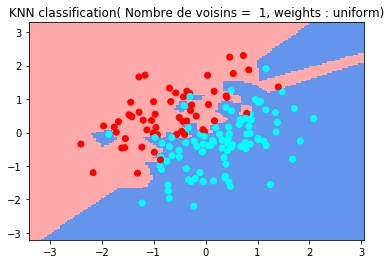

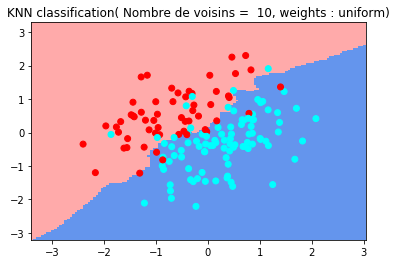

In [21]:
neighb = [1,10]
for i in neighb:
    n_neighbors = i
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(X,Y)
    plot_color_decision_knn(knn, plt)
plt.show()

Lorsque nous n'avons pris qu'un seul voisin en considération, on constate que notre modèle risque un *overfitting* \
Par contre, on remarque l'existence de plusieurs points mal classifiés dans le cas où k = 10. Autrement dit, que l'algorithme de plus poche voisin avec cette configuration, n'a pas pu bien traiter le bruit que nous avons ajouté ( qui a mené à ce que nos données ne soient pas séparables ) \

Afin d'avoir un modèle plus affine, on peut tourner une **GridSearchCV**

In [22]:
parameters = { 'n_neighbors' : np.arange(1,80),
              'weights' : ['uniform', 'distance']    
}
seed = 65
cv = KFold(n_splits = 5, shuffle=True, random_state = seed)

knn = neighbors.KNeighborsClassifier()

knn_gs = GridSearchCV(knn, parameters, cv=cv)

knn_gs.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=65, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
                         'weights': ['uniform', 'distance']})

In [23]:
print('The best configuration is: k = {} and weights = {}'.format(knn_gs.best_params_['n_neighbors'],
                                                                  knn_gs.best_params_['weights']))

The best configuration is: k = 20 and weights = uniform


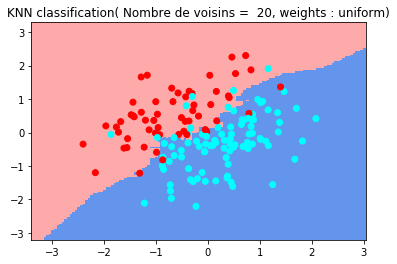

In [24]:
n_neighbors = knn_gs.best_params_['n_neighbors']
weights= knn_gs.best_params_['weights']

best_knn = neighbors.KNeighborsClassifier(n_neighbors = 6, weights='uniform')

best_knn.fit(X,Y)

plot_color_decision_knn(best_knn, plt)

On constate que la classification est meilleur que celle d'avant

##### Exemple 3

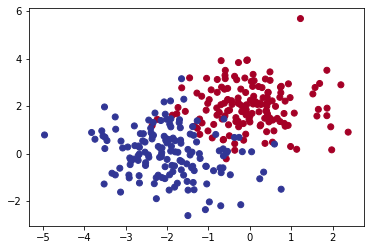

In [25]:
n=150
X=np.append(np.random.randn(n,2)+[0,2],np.random.randn(n,2)+[-2,0],axis=0)
w=[-1,1]
b=0
Y=np.append(np.zeros(n),np.ones(n))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="RdYlBu");



In [26]:
parameters = { 'n_neighbors' : np.arange(1,80),
              'weights' : ['uniform', 'distance']    
}
seed = 65
cv = KFold(n_splits = 5, shuffle=True, random_state = seed)

knn = neighbors.KNeighborsClassifier()

knn_gs = GridSearchCV(knn, parameters, cv=cv)

knn_gs.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=65, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
                         'weights': ['uniform', 'distance']})

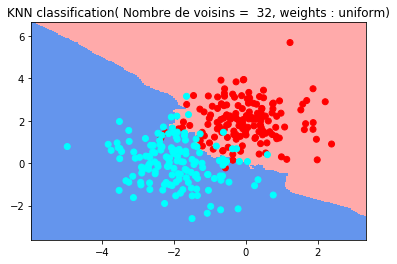

In [27]:
n_neighbors = knn_gs.best_params_['n_neighbors']
weights= knn_gs.best_params_['weights']

best_knn = neighbors.KNeighborsClassifier(n_neighbors = 6, weights='uniform')

best_knn.fit(X,Y)

plot_color_decision_knn(best_knn, plt)

##### Exemple 4

(300, 2)


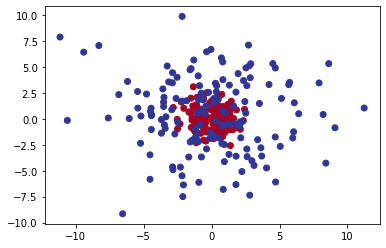

In [28]:
n=150
X=np.append(np.random.randn(n,2),4*np.random.randn(n,2),axis=0)
print(X.shape)
w=[1,1]
b=0
Y=np.append(np.zeros(n),np.ones(n),axis=0)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="RdYlBu");

In [29]:
parameters = { 'n_neighbors' : np.arange(1,80),
              'weights' : ['uniform', 'distance']    
}
seed = 65
cv = KFold(n_splits = 5, shuffle=True, random_state = seed)

knn = neighbors.KNeighborsClassifier()

knn_gs = GridSearchCV(knn, parameters, cv=cv)

knn_gs.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=65, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79]),
                         'weights': ['uniform', 'distance']})

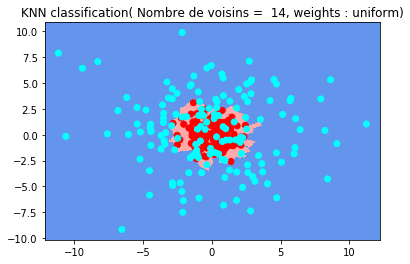

In [30]:
n_neighbors = knn_gs.best_params_['n_neighbors']
weights= knn_gs.best_params_['weights']

best_knn = neighbors.KNeighborsClassifier(n_neighbors = 6, weights='uniform')

best_knn.fit(X,Y)

plot_color_decision_knn(best_knn, plt)